K means clustering implementation-Unsupervised algorithm

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data=pd.read_csv("Mall_Customers.csv")
data.shape

(200, 5)

In [13]:
x=data.iloc[:,3:].values

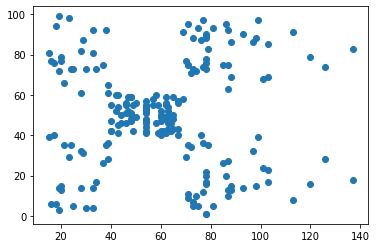

In [14]:
#plot the data among these two features
plt.scatter(x[:,0],x[:,1])

In [15]:
# to find the number of clusters WCSS(inertia) where we plot elbow graph to find k
wcss=[]
for i in range(1,11): #trial and error
    k=KMeans(n_clusters=i,init="k-means++",random_state=0)
    k.fit(x)
    wcss.append(k.inertia_)

Text(0, 0.5, 'wcss')

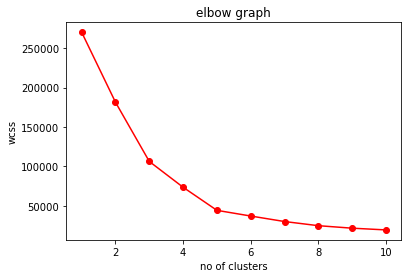

In [16]:
#plot a graph by taking iteration values and WCSS
plt.plot(range(1,11),wcss,c='r')
plt.scatter(range(1,11),wcss,c='r')
plt.title("elbow graph")
plt.xlabel("no of clusters")
plt.ylabel("wcss")

By looking into the elbow graph the optimal cluster values is 5(K value)

In [17]:
# let us find which dataset belongs to clusters
k=KMeans(n_clusters=5,init="k-means++",random_state=0)
y=k.fit_predict(x)   # will help us which data points belongs to cluster
y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [18]:
#position of the centroids at centres
k.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

Text(0, 0.5, 'spending score')

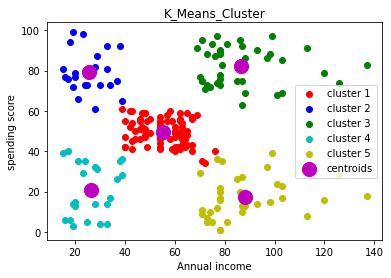

In [19]:
#plot the final graph
plt.scatter(x[y==0,0],x[y==0,1],c='r',label="cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],c='b',label="cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],c='g',label="cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],c='c',label="cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],c='y',label="cluster 5")
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],s=200,c='m',label="centroids")
plt.legend()
plt.title("K_Means_Cluster")
plt.xlabel("Annual income")
plt.ylabel("spending score")


### Interpretation of the graph
### Cluster 4: Less salary and less spending score
### Cluster 2: Less salary and high spending score
### Cluster 1: Average salary and average spending score
### Cluster 3: High salary and high spending score(Offers can be provided)
### Cluster 5: High salary and

End of Program 3